# Just The Facts...

Lets start with a simple line fit.

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

Create some random data

In [2]:
rng = jax.random.PRNGKey(0)
x = jax.random.normal(rng, (100,))
y = 3*x + 2 + 1.0*jax.random.normal(rng, (100,))

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Lets plot this so we can see what we are doing

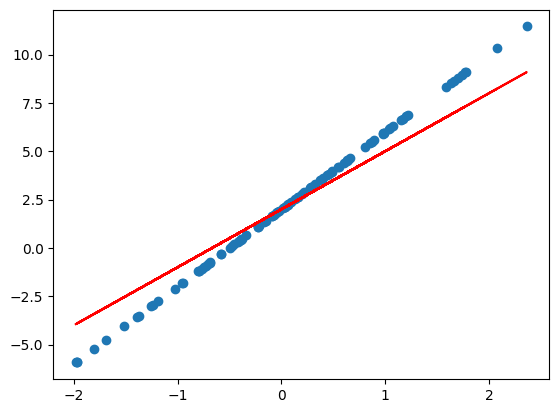

In [3]:
plt.scatter(x, y)
plt.plot(x, 3*x + 2, color='red')
plt.show()

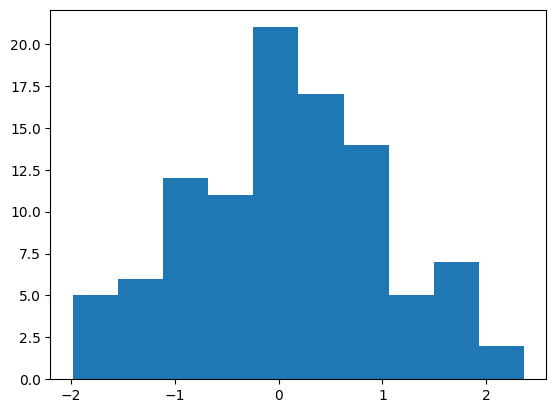

In [4]:
delta = y - (3*x + 2)
plt.hist(delta)
plt.show()

In [5]:
def network(params, x):
    w, b = params
    return w*x + b

In [6]:
def loss(params, x, y):
    y_pred = network(params, x)
    return jnp.mean((y_pred - y)**2)

In [7]:
grad_loss = jax.grad(loss)

In [8]:
params = jnp.array([1.0, 1.0])

In [9]:
lr = 0.1

In [10]:
def one_epoch(params, x, y, i_epoch):
    g = grad_loss(params, x, y)
    params -= lr*g
    print(f'Step {i_epoch}, loss {loss(params, x, y)}')
    return params

In [11]:
for i_epoch in range(10):
    params = one_epoch(params, x, y, i_epoch)

Step 0, loss 6.211575984954834
Step 1, loss 4.063226222991943
Step 2, loss 2.6641485691070557
Step 3, loss 1.7509284019470215
Step 4, loss 1.1534546613693237
Step 5, loss 0.7616392970085144
Step 6, loss 0.5040866136550903
Step 7, loss 0.3343898057937622
Step 8, loss 0.22231805324554443
Step 9, loss 0.14813144505023956


In [12]:
print(f"Final parameters: {params}")

Final parameters: [3.5972004 1.9656084]


In [13]:
params = jnp.array([1.0, 1.0])
param_history = [params]
for i in range(50):
    params = one_epoch(params, x, y, i)
    param_history.append(params.copy())

Step 0, loss 6.211575984954834
Step 1, loss 4.063226222991943
Step 2, loss 2.6641485691070557
Step 3, loss 1.7509284019470215
Step 4, loss 1.1534546613693237
Step 5, loss 0.7616392970085144
Step 6, loss 0.5040866136550903
Step 7, loss 0.3343898057937622
Step 8, loss 0.22231805324554443
Step 9, loss 0.14813144505023956
Step 10, loss 0.09891105443239212
Step 11, loss 0.06618162244558334
Step 12, loss 0.04437047243118286
Step 13, loss 0.029804367572069168
Step 14, loss 0.020056743174791336
Step 15, loss 0.013520588167011738
Step 16, loss 0.009129590354859829
Step 17, loss 0.006174273788928986
Step 18, loss 0.004181828815490007
Step 19, loss 0.0028362926095724106
Step 20, loss 0.0019262029090896249
Step 21, loss 0.0013097451301291585
Step 22, loss 0.0008915959042496979
Step 23, loss 0.0006075868150219321
Step 24, loss 0.00041445702663622797
Step 25, loss 0.0002829725854098797
Step 26, loss 0.00019336718833073974
Step 27, loss 0.0001322388561675325
Step 28, loss 9.050128574017435e-05
Step 2

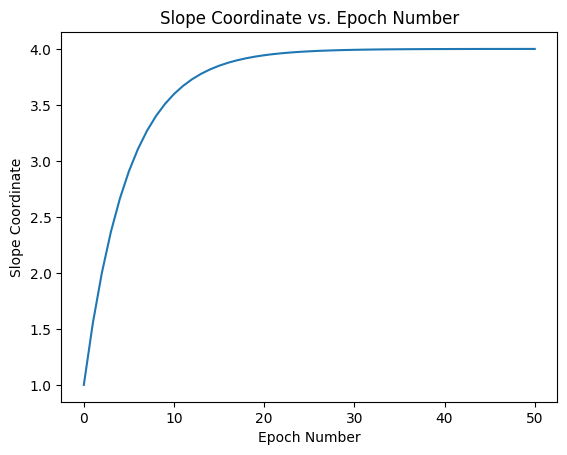

In [14]:
# Extract the first coordinate from param_history
first_coordinate = [param[0] for param in param_history]

# Plot the first coordinate as a function of the epoch number
plt.plot(range(len(first_coordinate)), first_coordinate)
plt.xlabel('Epoch Number')
plt.ylabel('Slope Coordinate')
plt.title('Slope Coordinate vs. Epoch Number')
plt.show()


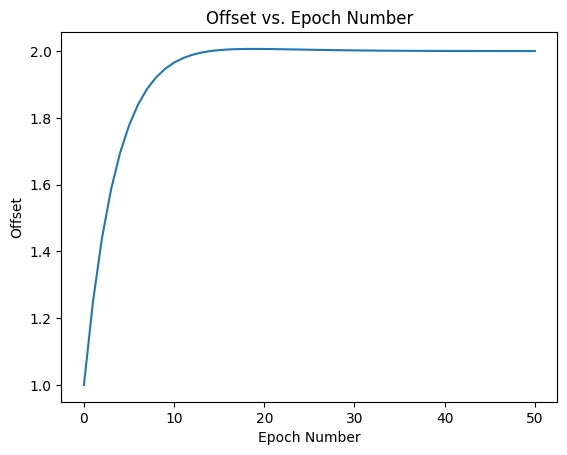

In [15]:
# Extract the second coordinate from param_history
second_coordinate = [param[1] for param in param_history]

# Plot the second coordinate as a function of the epoch number
plt.plot(range(len(second_coordinate)), second_coordinate)
plt.xlabel('Epoch Number')
plt.ylabel('Offset')
plt.title('Offset vs. Epoch Number')
plt.show()
